In [271]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
plt.style.use('ggplot')

data = pd.read_csv('diabetes.csv')

## Exploración descriptiva

In [272]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [273]:
display.display(data.describe())

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [274]:
rows_amount =  len(data.index.unique())
non_diabetic = data[data["Outcome"] == 0].count()["Outcome"]
diabetic = data[data["Outcome"] == 1].count()["Outcome"]

print('Número de filas: ' + str(rows_amount))
print(f'Número de no-diabeticos: {str(non_diabetic)}')
print(f'Número de diabeticos: {str(diabetic)}')
print("----------------------------------")
print(f"El {math.ceil(diabetic*100/rows_amount)}% de las muestran representan diabéticos")

Número de filas: 768
Número de no-diabeticos: 500
Número de diabeticos: 268
----------------------------------
El 35% de las muestran representan diabéticos


In [318]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

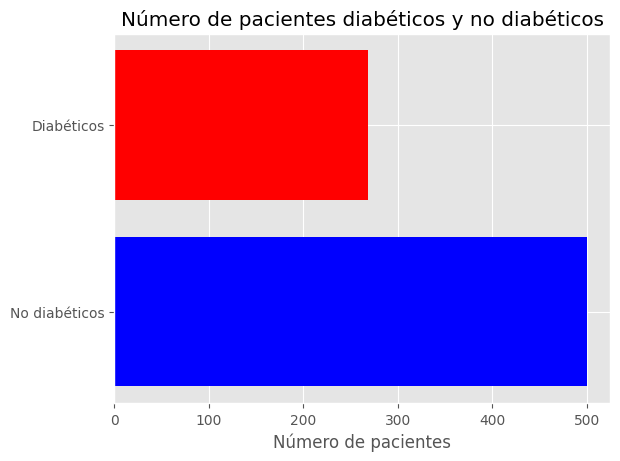

In [275]:
labels = ['No diabéticos', 'Diabéticos']
counts = [data[data["Outcome"] == 0].count()["Outcome"], data[data["Outcome"] == 1].count()["Outcome"]]

plt.barh(labels, counts, color=['blue', 'red'])
plt.xlabel('Número de pacientes')
plt.title('Número de pacientes diabéticos y no diabéticos')
plt.show()

## Visualización de datos

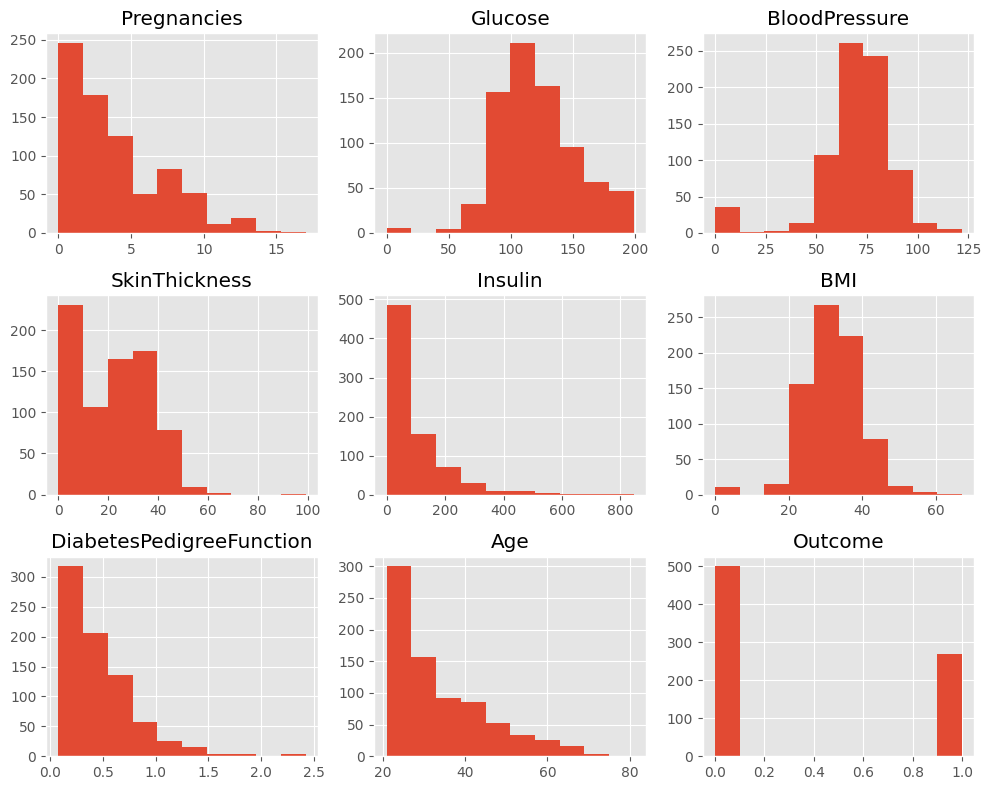

In [276]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()  

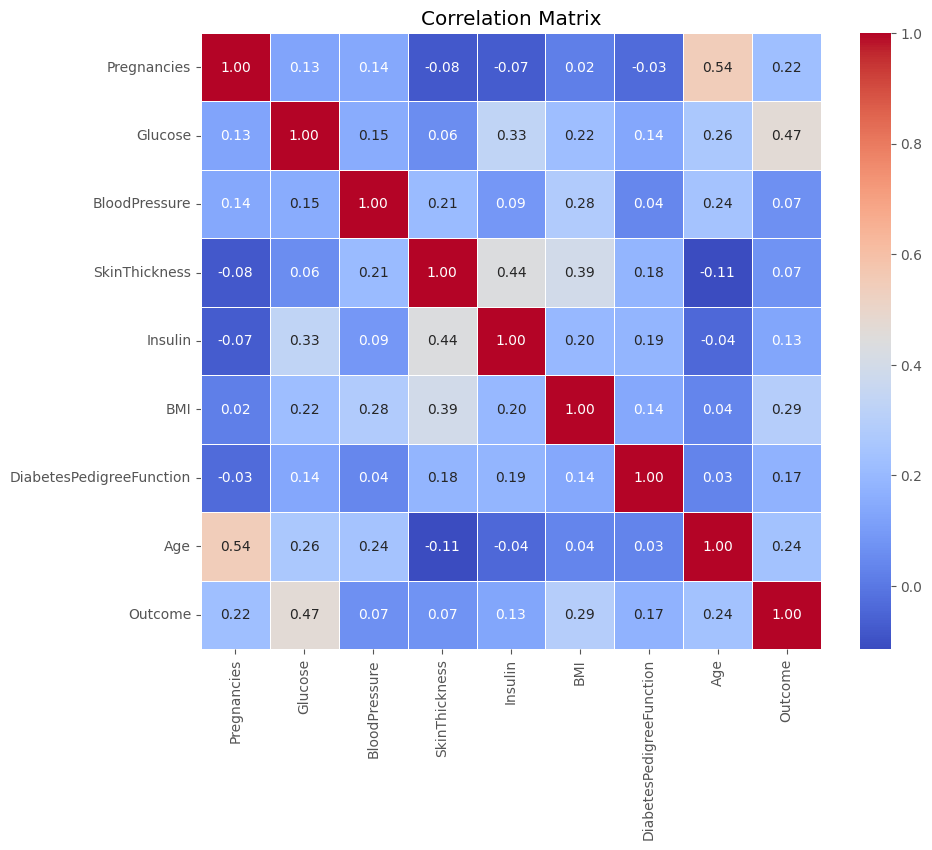

In [277]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


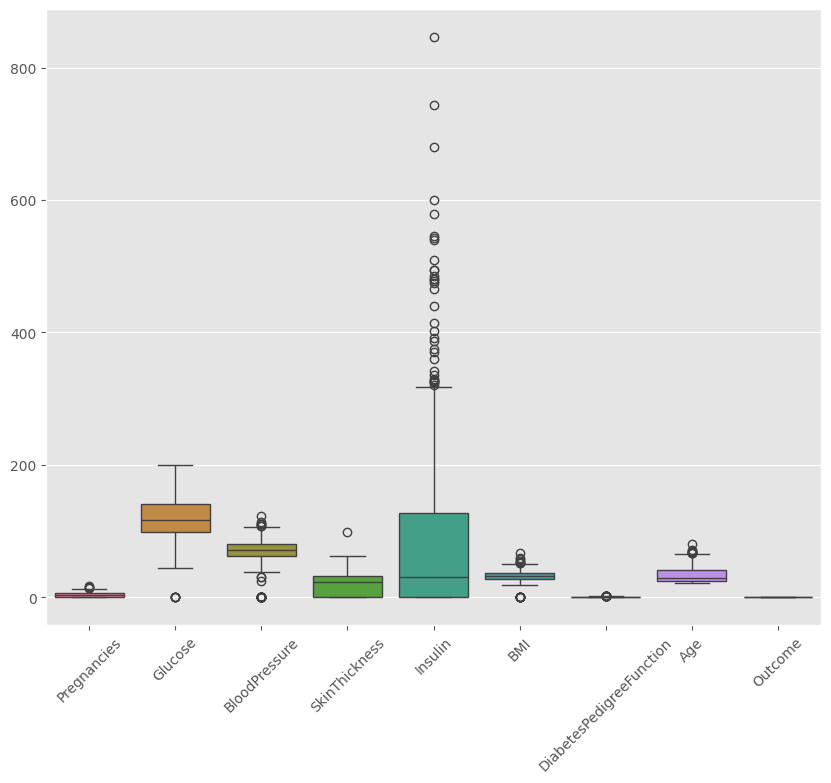

In [278]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

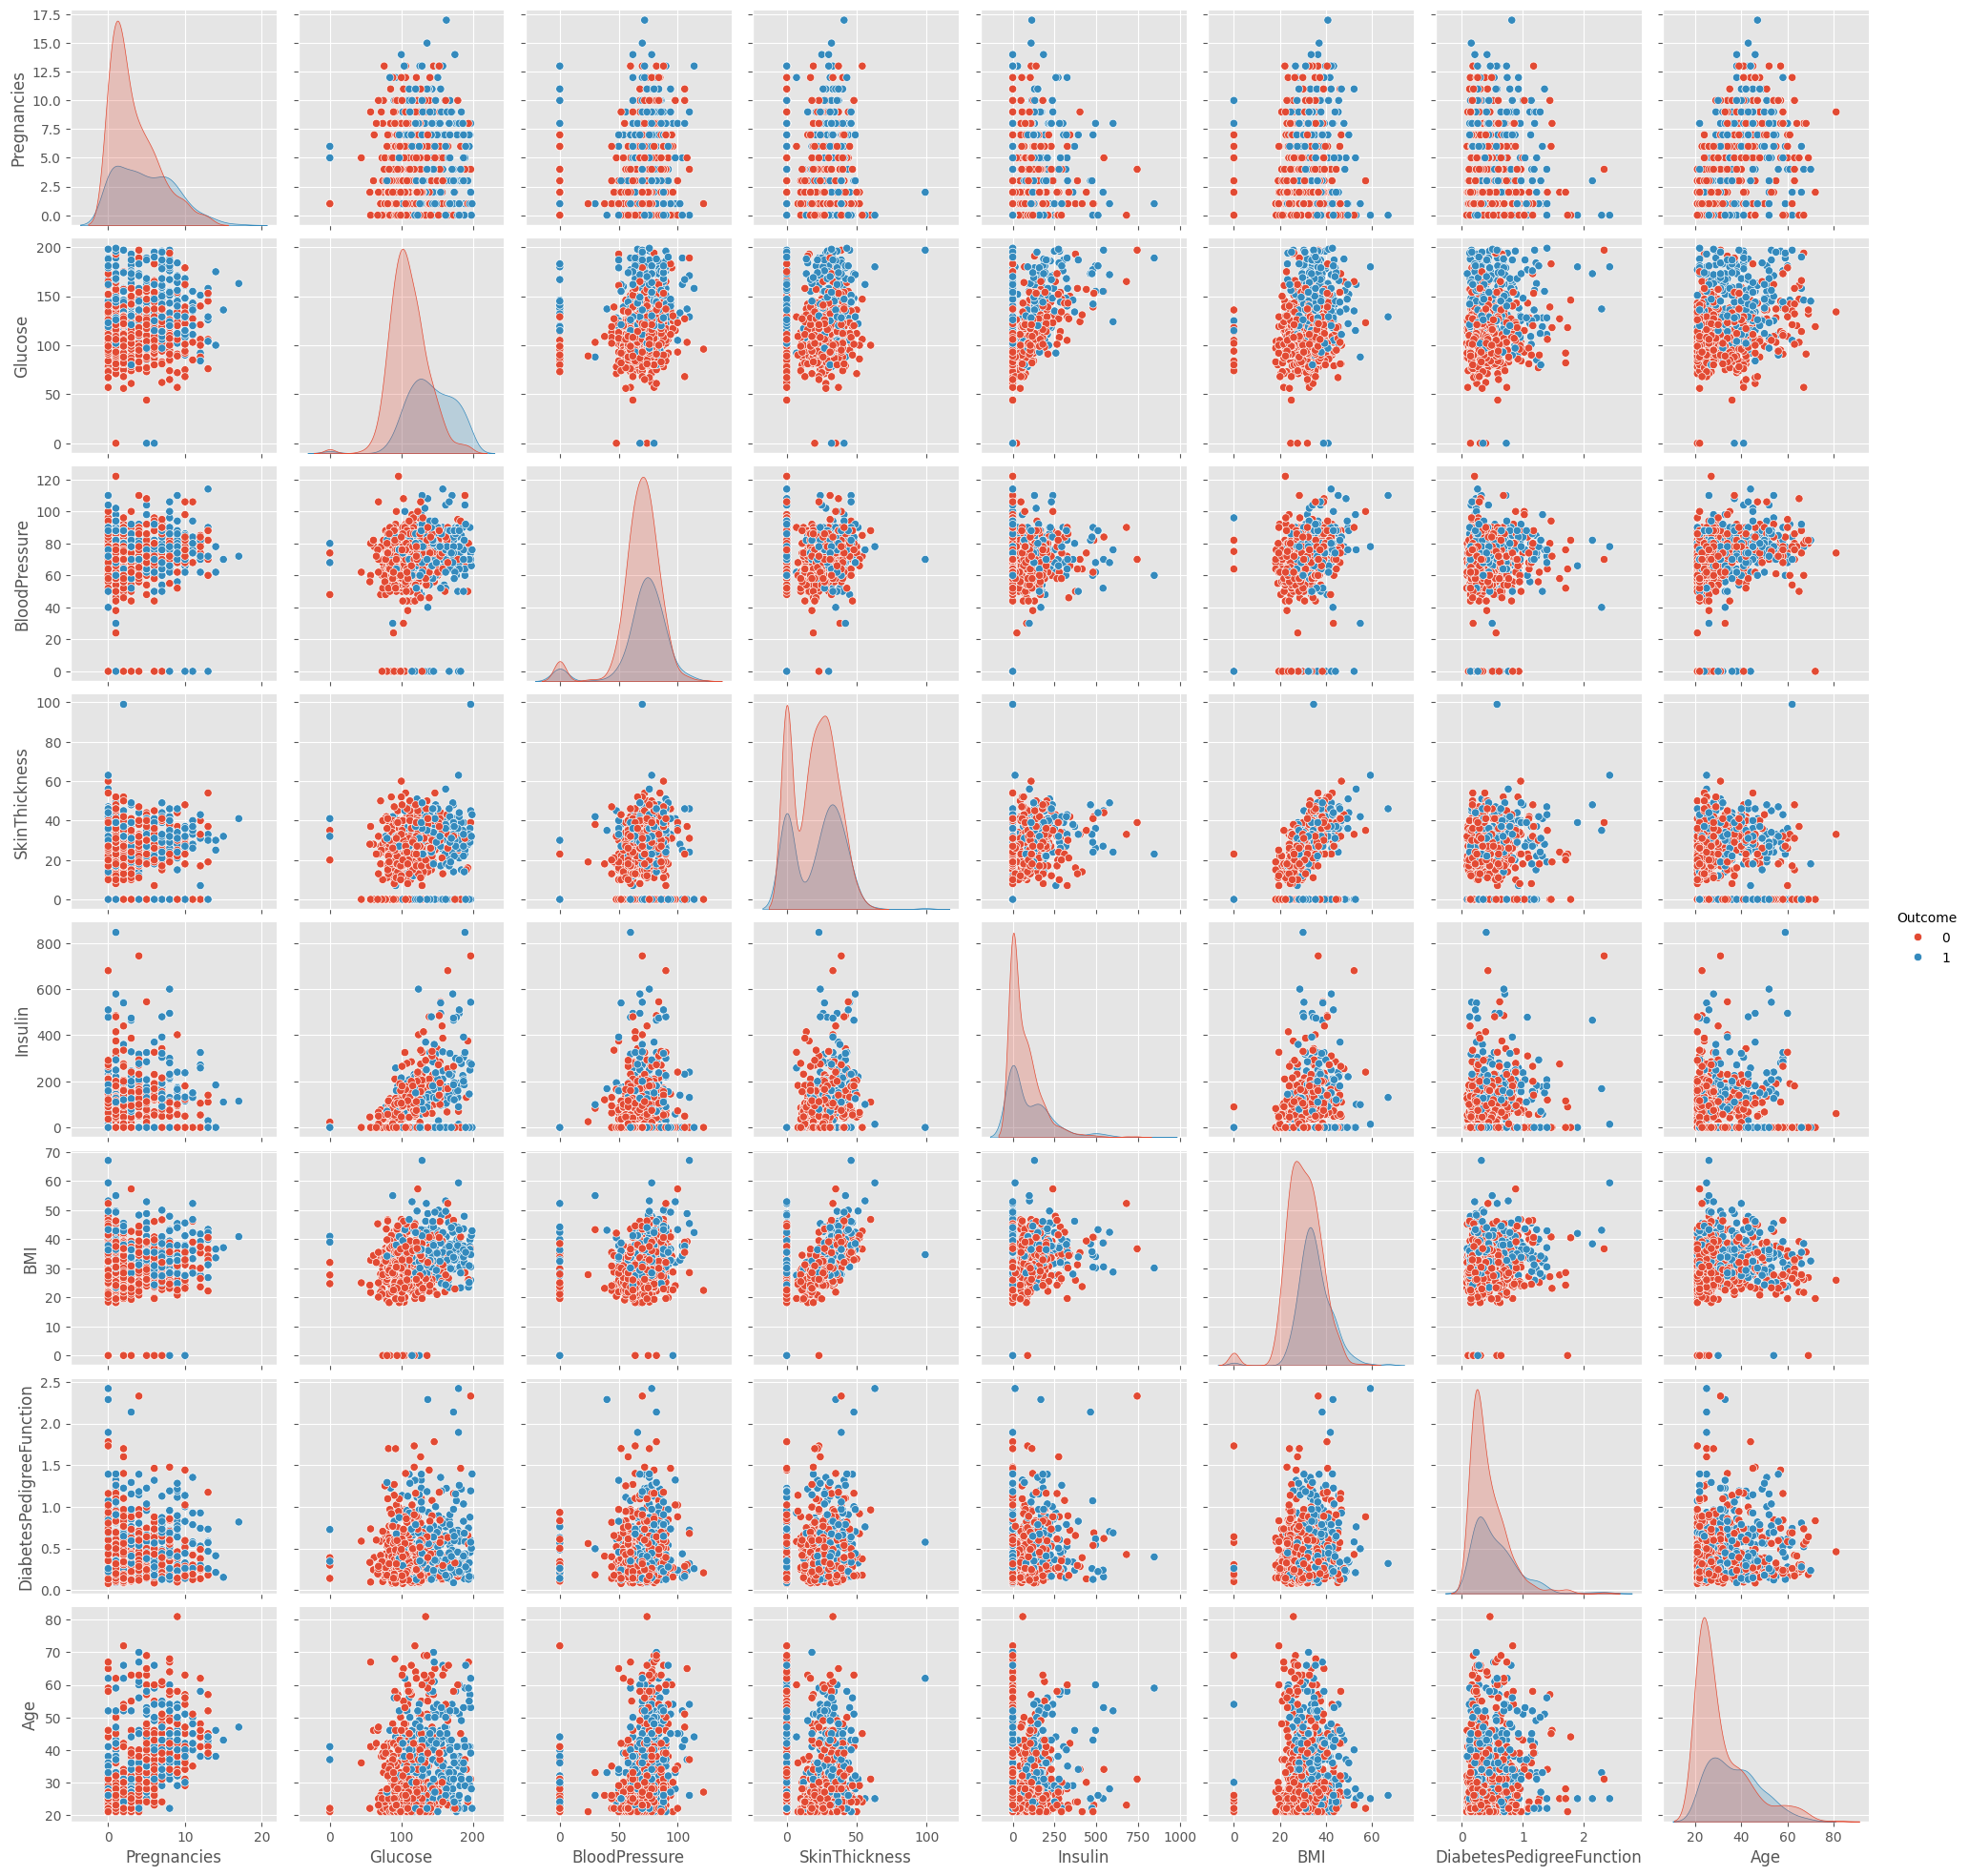

In [279]:
sns.pairplot(data,hue="Outcome")
plt.show()

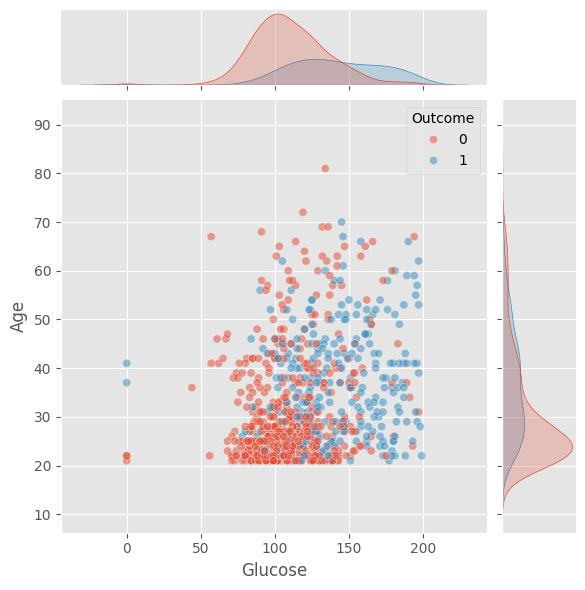

In [280]:
sns.jointplot(x='Glucose', y='Age',hue="Outcome", data=data, kind='scatter',alpha=0.5);

Conclusiones aca

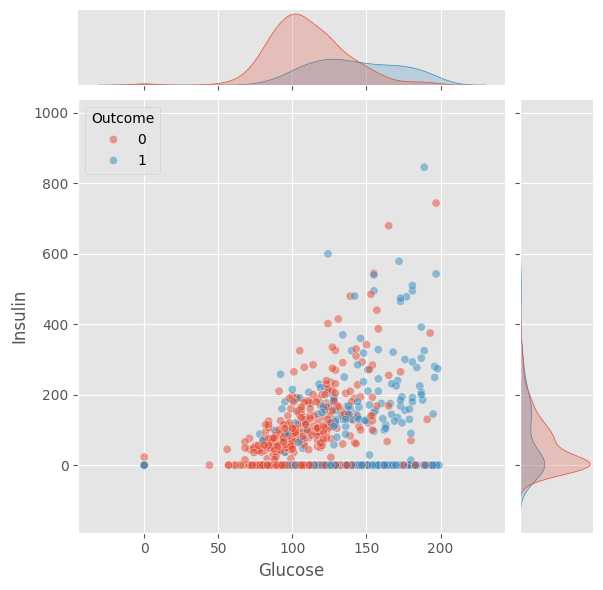

In [281]:
sns.jointplot(x='Glucose', y='Insulin',hue="Outcome", data=data, kind='scatter',alpha=0.5);

### Bmi Deviation exploration

In [282]:
df_bmi = pd.DataFrame(data['BMI'])
df_bmi

BMI
0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
..    ...
763  32.9
764  36.8
765  26.2
766  30.1
767  30.4

[768 rows x 1 columns]

In [283]:
bmi_median = df_bmi.median()
bmi_median

BMI    32.0
dtype: float64

In [284]:
bmi_deviations = df_bmi - bmi_median
bmi_deviations

BMI
0     1.6
1    -5.4
2    -8.7
3    -3.9
4    11.1
..    ...
763   0.9
764   4.8
765  -5.8
766  -1.9
767  -1.6

[768 rows x 1 columns]

In [285]:
avg_deviation = bmi_deviations.mean()
avg_deviation_label = 'Average Deviation: '+ str(round(float(avg_deviation),2))

C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\1120980584.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg_deviation_label = 'Average Deviation: '+ str(round(float(avg_deviation),2))


C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\386114017.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axhline(y=float(avg_deviation), color='r', linestyle='--', label=avg_deviation_label)


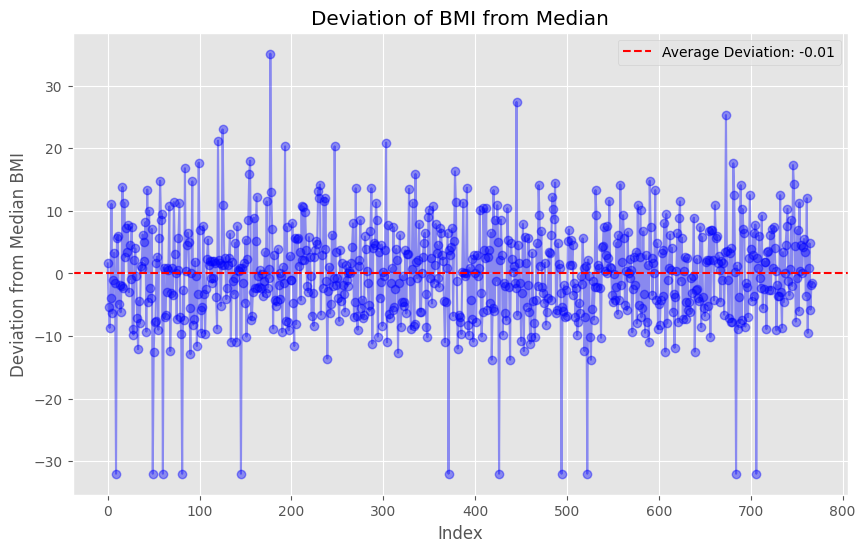

In [286]:
# Plot the deviations
plt.figure(figsize=(10, 6))
plt.plot(bmi_deviations, marker='o', linestyle='-', color='b', alpha=0.4)
plt.axhline(y=float(avg_deviation), color='r', linestyle='--', label=avg_deviation_label)
plt.title('Deviation of BMI from Median')
plt.xlabel('Index')
plt.ylabel('Deviation from Median BMI')
plt.grid(True)
plt.legend()
plt.show()

### BMI Manhattan Norm

In [287]:
bmi_manhattan_norm = pd.DataFrame(bmi_deviations.abs())
mean_absolute_deviation = bmi_manhattan_norm.mean()
mean_absoulte_deviation_label = 'Mean Absolute Deviation: '+ str(round(float(mean_absolute_deviation),2))

C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\3309707317.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_absoulte_deviation_label = 'Mean Absolute Deviation: '+ str(round(float(mean_absolute_deviation),2))


C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\4249967171.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axhline(y=float(mean_absolute_deviation), color='r', linestyle='--', label=mean_absoulte_deviation_label)


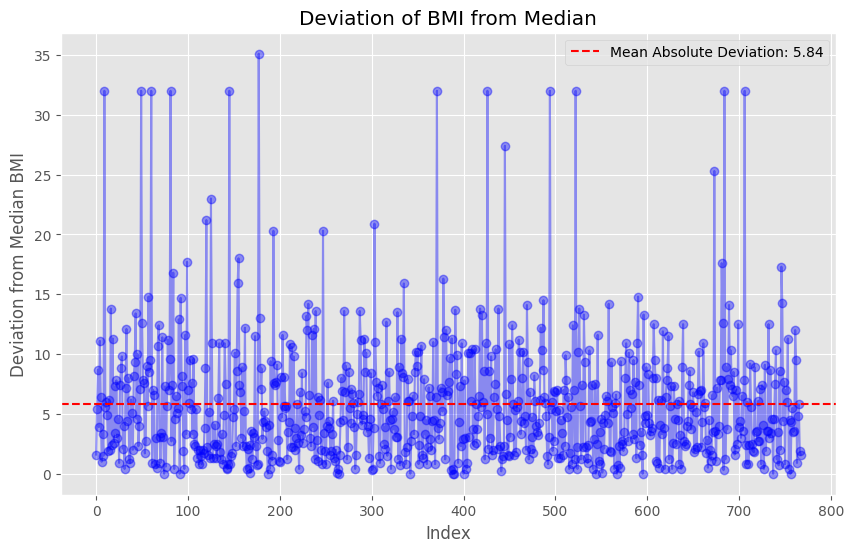

In [288]:
# Plot the deviations
plt.figure(figsize=(10, 6))
plt.plot(bmi_manhattan_norm, marker='o', linestyle='-', color='b', alpha=0.4)
plt.axhline(y=float(mean_absolute_deviation), color='r', linestyle='--', label=mean_absoulte_deviation_label)
plt.title('Deviation of BMI from Median')
plt.xlabel('Index')
plt.ylabel('Deviation from Median BMI')
plt.grid(True)
plt.legend()
plt.show()

## 3. Preprocesamiento

In [289]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [290]:
data_clean = data 

In [291]:
nulls_before = data_clean.isnull().sum().sum()
nulls_before

0

In [292]:
data_clean.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Remove BMI with a Mean Absolute Deviation >= 25

In [293]:
bmi_mean = df_bmi.median()

In [294]:
data_clean['BMI_Manhattan_Norm'] = bmi_manhattan_norm
data_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BMI_Manhattan_Norm  
0                       0.627   50        1                 1.6  
1                       0.351   31        0                 5.4  
2                       0.672   32        1                 8.7  
3                       0.167   21        0                 3.9  
4                       2.288   33        1                11.1  
..                        ...  ...      ...                 ...  
763                     0.171   63        0                 0.9  
764                     0.340   27        0                 4.8  
765                     0.245   30        0                 5.8  
766                     0.349   47        1                 1.9  
767                     0.315   23        0                 1.6  

[768 rows x 10 columns]

Replace value with mean if Absolute Mean Deviation is >= 25

In [295]:
# Replace values in Column1 based on condition
data_clean.loc[data_clean['BMI_Manhattan_Norm'] >= 20, 'BMI'] = bmi_mean

In [296]:
clean_bmi_median = data_clean['BMI'].median()
clean_bmi_median

32.0

In [297]:
clean_bmi_deviations = pd.DataFrame(data_clean['BMI']) - clean_bmi_median
clean_bmi_deviations

BMI
0     1.6
1    -5.4
2    -8.7
3    -3.9
4    11.1
..    ...
763   0.9
764   4.8
765  -5.8
766  -1.9
767  -1.6

[768 rows x 1 columns]

In [298]:
avg_clean_deviation = clean_bmi_deviations.mean()
avg_clean_deviation_label = 'Mean Clean Deviation: '+ str(round(float(avg_deviation),2))

C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\3570734009.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  avg_clean_deviation_label = 'Mean Clean Deviation: '+ str(round(float(avg_deviation),2))


C:\Users\Lorenn\AppData\Local\Temp\ipykernel_19276\379018751.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axhline(y=float(avg_clean_deviation), color='r', linestyle='--', label=avg_clean_deviation_label)


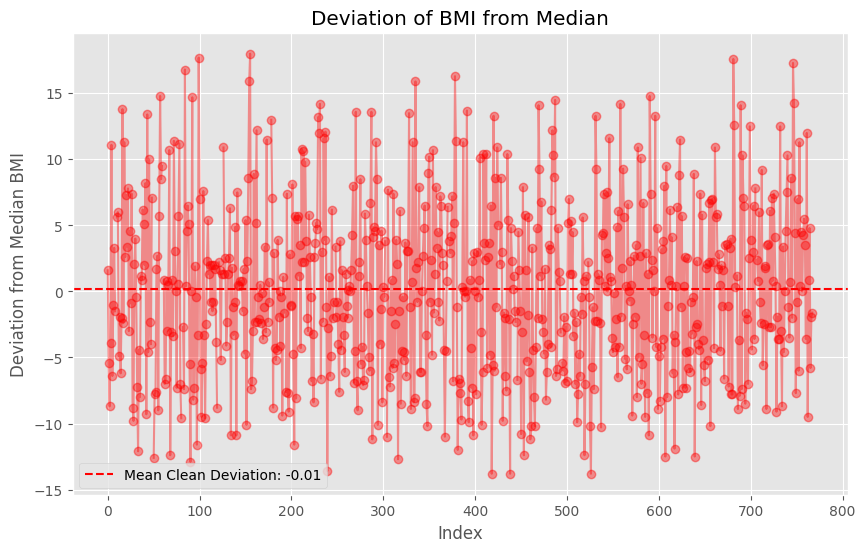

In [299]:
# # Plot the deviations
plt.figure(figsize=(10, 6))
plt.plot(clean_bmi_deviations, marker='o', linestyle='-', color='r', alpha=0.4)
plt.axhline(y=float(avg_clean_deviation), color='r', linestyle='--', label=avg_clean_deviation_label)
plt.title('Deviation of BMI from Median')
plt.xlabel('Index')
plt.ylabel('Deviation from Median BMI')
plt.grid(True)
plt.legend()
plt.show()

## Stuff

In [300]:
from scipy import stats

In [301]:

data_clean.loc[data_clean['Glucose']==0, 'Glucose'] = np.nan
data_clean.loc[data_clean['BloodPressure']==0, 'BloodPressure'] = np.nan
data_clean.loc[data_clean['BMI']==0, 'BMI'] = np.nan
data_clean.loc[data_clean['Insulin']==0, 'Insulin'] = np.nan
data_clean.loc[data_clean['SkinThickness']==0, 'SkinThickness'] = np.nan

In [302]:
bmi_trimmed_mean = stats.trim_mean(data_clean['BMI'][data_clean['BMI'] != 0], proportiontocut=0.1)

In [303]:
bmi_trimmed_mean

32.28831168831169

In [304]:
data_clean.loc[data_clean['BMI'] == 0, 'BMI'] = bmi_trimmed_mean 

In [305]:
data_clean.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  749.000000                768.000000  768.000000  768.000000   
mean    32.204005                  0.471876   33.240885    0.348958   
std      6.491385                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.400000                  0.243750   24.000000    0.000000   
50%     32.000000                  0.372500   29.000000    0.000000   
75%     36.500000                  0.626250   41.000000    1.000000   
max     50.000000                  2.420000   81.000000    1.000000   

       BMI_Manhattan_Norm  
count          768.000000  
mean             5.842057  
std              5.290171  
min              0.000000  
25%              2.200000  
50%              4.600000  
75%              7.800000  
max             35.100000

In [306]:
nulls_now = data_clean.isnull().sum().sum()
print('Número de datos nulos descartados: ' + str(nulls_now - nulls_before))

Número de datos nulos descartados: 660


In [307]:
data_clean.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  749.000000                768.000000  768.000000  768.000000   
mean    32.204005                  0.471876   33.240885    0.348958   
std      6.491385                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.400000                  0.243750   24.000000    0.000000   
50%     32.000000                  0.372500   29.000000    0.000000   
75%     36.500000                  0.626250   41.000000    1.000000   
max     50.000000                  2.420000   81.000000    1.000000   

       BMI_Manhattan_Norm  
count          768.000000  
mean             5.842057  
std              5.290171  
min              0.000000  
25%              2.200000  
50%              4.600000  
75%              7.800000  
max             35.100000

In [308]:
nan_counts = data.isna().sum()
print("Categoria -----------------  N/a")
print("---------------------------------")
print(nan_counts)

Categoria -----------------  N/a
---------------------------------
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          19
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_Manhattan_Norm            0
dtype: int64


In [309]:
nan_counts = data_clean.isna().sum()
print("Categoria -----------------  N/a")
print("---------------------------------")
print(nan_counts)

Categoria -----------------  N/a
---------------------------------
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          19
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_Manhattan_Norm            0
dtype: int64


#### Clean Glucose

In [310]:
nan_counts = data_clean['Glucose'].isna().sum()
print("Categoria ----------  N/a")
print(nan_counts)

Categoria ----------  N/a
5


In [311]:
# Assuming data_clean is your DataFrame
trimmed_mean = stats.trim_mean(data_clean['Glucose'].dropna(), 0.1)  # Trimmed mean with 10% trimming

# Replace NaN values with the calculated trimmed mean
data_clean['Glucose'].fillna(trimmed_mean, inplace=True)

In [312]:
nan_counts = data_clean['Glucose'].isna().sum()
print("Categoria ----------  N/a")
print(nan_counts)

Categoria ----------  N/a
0


#### Clean BloodPressure

#### Clean SkinThickness

#### Clean Insulin

#### Clean BMI

## 4. Exploración de datos preprocesados

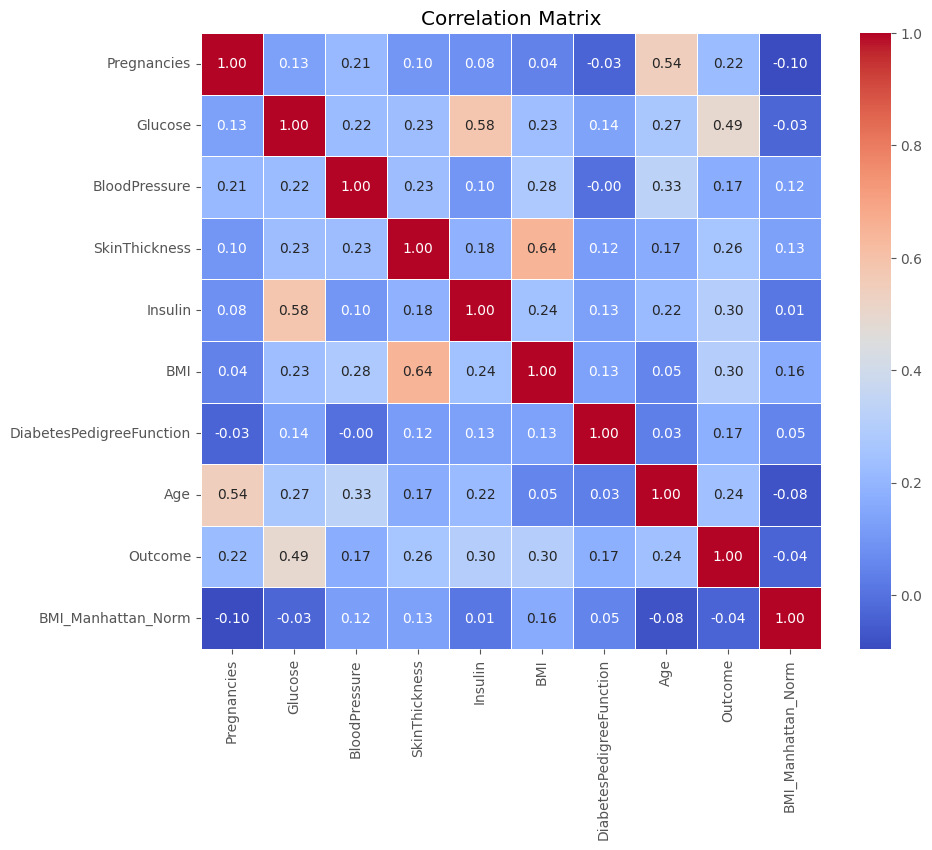

In [313]:
correlation_matrix = data_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

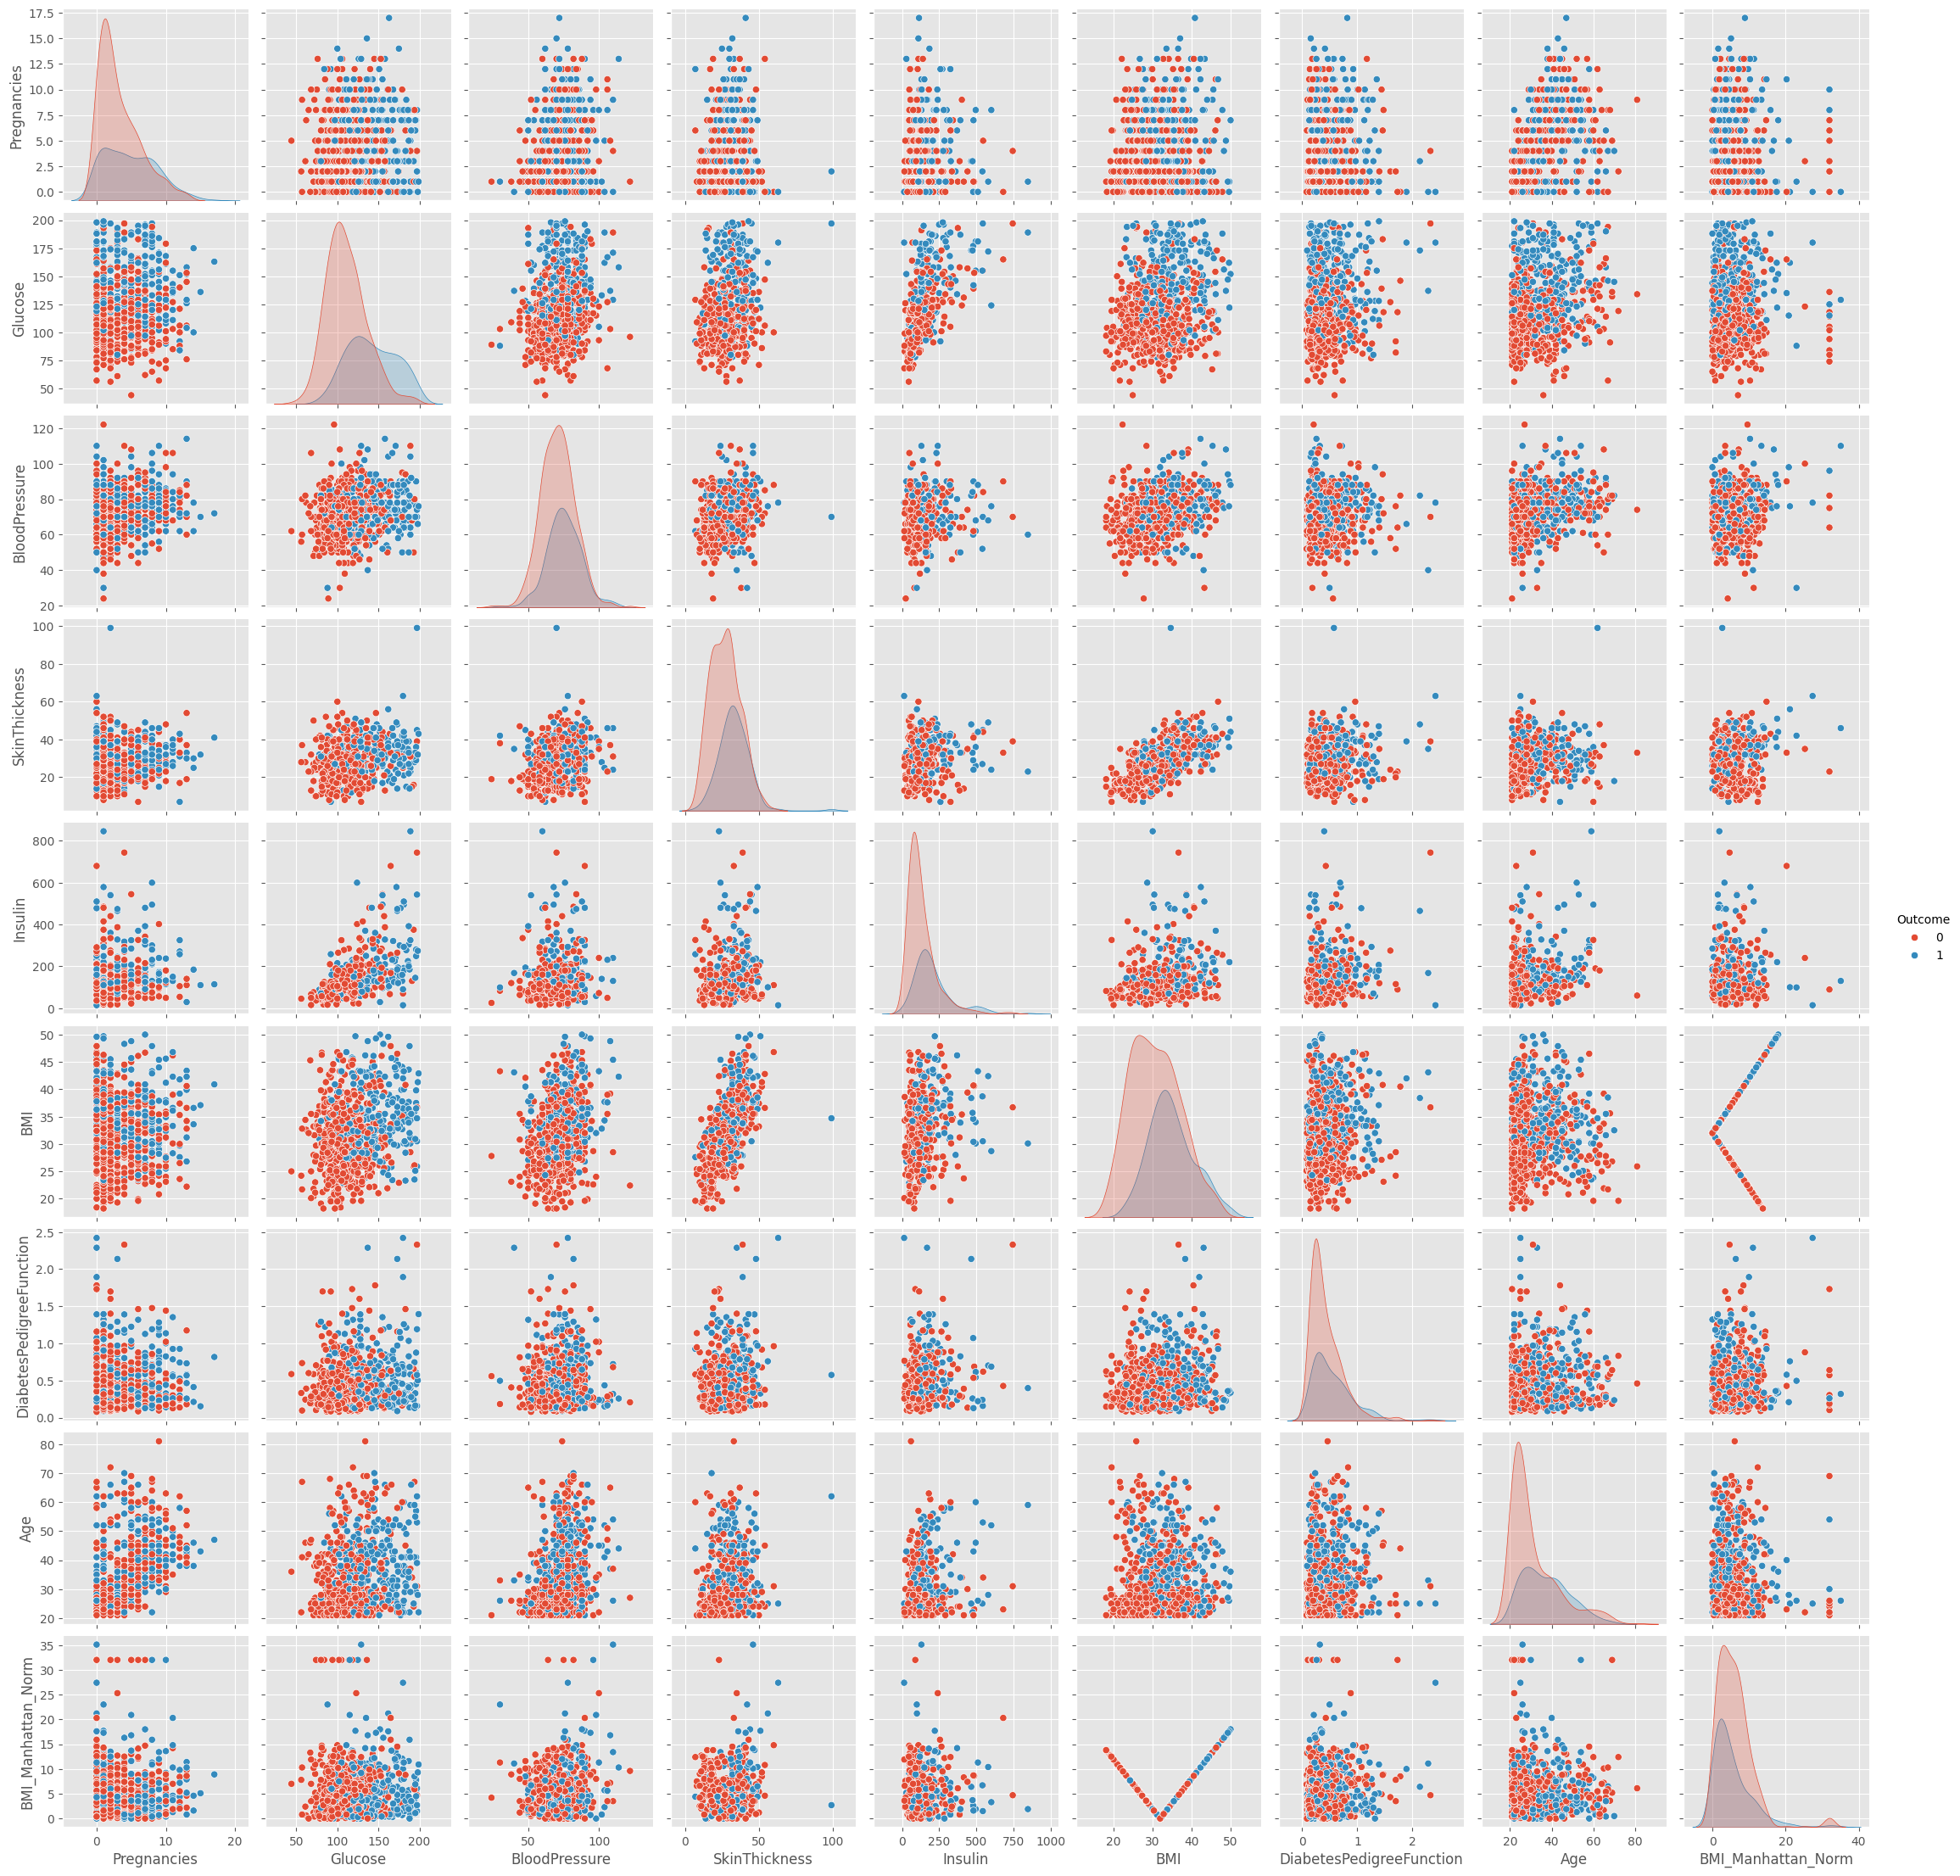

In [314]:
sns.pairplot(data_clean,hue="Outcome")
plt.show()

## 5. Feature engineering

In [315]:
cooked_data = pd.DataFrame()
cooked_data['blood_presure'] = data_clean['BloodPressure']
cooked_data['skin_thickness'] = data_clean['SkinThickness']

Transformar insulin en una variable categórica. Se ha medido o no

In [316]:
cooked_data

blood_presure  skin_thickness
0             72.0            35.0
1             66.0            29.0
2             64.0             NaN
3             66.0            23.0
4             40.0            35.0
..             ...             ...
763           76.0            48.0
764           70.0            27.0
765           72.0            23.0
766           60.0             NaN
767           70.0            31.0

[768 rows x 2 columns]

## 6. Logistic Regresion Model

Dividir data entre training y sample set

In [317]:
data_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BMI_Manhattan_Norm  
0                       0.627   50        1                 1.6  
1                       0.351   31        0                 5.4  
2                       0.672   32        1                 8.7  
3                       0.167   21        0                 3.9  
4                       2.288   33        1                11.1  
..                        ...  ...      ...                 ...  
763                     0.171   63        0                 0.9  
764                     0.340   27        0                 4.8  
765                     0.245   30        0                 5.8  
766                     0.349   47        1                 1.9  
767                     0.315   23        0                 1.6  

[768 rows x 10 columns]

Model Building

Model Evaluation